## Extract run information from metadatabase.

In [33]:
!pwd

/mnt/ebola/ebov/ipynb


In [ ]:
make_stats_file.py ../metadata/metadata.db all | intersection_vcf_stats.py /dev/stdin | grep np-new-filter_qual | awk -v OFS='\t' '{printf ("UPDATE runs SET tpr = %s WHERE Batch = \"%s\";\n", $10, $1);}' | sqlite3 ../metadata/metadata.db

In [34]:
!echo ".schema" | sqlite3 ../metadata/metadata.db

CREATE TABLE runs (sample_fk integer, batch varchar (100), batch2 varchar (100), include varchar (1), start datetime, "end" datetime, duration float, num_reads_pass integer, num_reads_fail integer, tpr float, num_reads_align integer, mean_cov float, median_cov float, paper_submission boolean, dataset STRING, start_second_batch datetime, end_second_batch datetime, duration_second_batch datetime, num_reads_pass_second_batch datetime, num_reads_fail_second_batch datetime, covered integer);
CREATE TABLE samples (LabID varchar (100), prefecture varchar (100), sousprefecture varchar (100), village varchar (100), ct varchar (100), date_sample_taken date, pcr_date_for_sequencing date, sequencing_date date, upload_date date, protocol varchar (100), notes varchar (100), notes2 varchar (100), destination varchar (100), prevlabbid varchar (100), seqid varchar (100), sample_type STRING (10));


In [42]:
sql="""
.mode tabs
.headers on

SELECT LabID as SampleID,
       date_sample_taken as SampleCollectionDate,

       num_reads_pass as Passing_Reads,
       num_reads_fail as Failing_Reads,
       num_reads_fail + num_reads_pass as Total_Reads,
       start as SequencingDate,
       duration/60 as DurationMinutes,
       (num_reads_pass+num_reads_fail)/(duration/60) as ReadsPerMinute,
       
       num_reads_pass_second_batch as Passing_Reads2,
       num_reads_fail_second_batch as Failing_Reads2,
       num_reads_fail_second_batch + num_reads_pass_second_batch as Total_Reads2,
       start_second_batch as SequencingDate2,
       duration_second_batch/60 as DurationMinutes2,
       (num_reads_pass_second_batch+num_reads_fail_second_batch)/(duration_second_batch/60) as ReadsPerMinute
       
FROM samples, runs
WHERE runs.sample_fk = samples.rowid
AND dataset = 'EMLab' AND include='T';
"""

!echo "$sql"| sqlite3 ../metadata/metadata.db
!echo ".output rundata.txt\n$sql" | sqlite3 ../metadata/metadata.db

SampleID	SampleCollectionDate	Passing_Reads	Failing_Reads	Total_Reads	SequencingDate	DurationMinutes	ReadsPerMinute	Passing_Reads2	Failing_Reads2	Total_Reads2	SequencingDate2	DurationMinutes2	ReadsPerMinute
EM_COY_2015_014370	2015-04-07	6929	3374	10303	2015-04-18 20:20:20	27.5833333333333	373.522658610272						
EM_COY_2015_015802	2015-04-14	4377	5995	10372	2015-04-20 19:58:17	39.9333333333333	259.732888146912						
EM_COY_2015_015815	2015-04-14	6675	4268	10943	2015-04-20 19:58:12	37.3333333333333	293.116071428571						
EM_GUI_2015_004674	2015-03-26	2667	1940	4607	2015-04-21 21:12:11	48.9333333333333	94.1485013623978						
EM_COY_2015_015972	2015-04-20	2049	1504	3553	2015-04-22 19:42:39	28.7666666666667	123.51100811124						
EM_COY_2015_015986	2015-04-20	2650	2232	4882	2015-04-22 19:42:57	28.8	169.513888888889						
EM_COY_2015_013671	2015-03-12	6022	3995	10017	2015-04-23 22:31:41	44.8666666666667	223.261515601783						
EM_COY_2015_013731	2015-03-14	5420	4594	10014	2015-04-23 22:32:16	3

# Alignment stats

In [46]:
sql="""
.mode tabs
.headers on

SELECT LabID as SampleID,
       num_reads_align as Aligned_2D_Reads,
       mean_cov as Mean_Coverage,
       median_cov as Median_Coverage,
       covered as CovGt25x,
       tpr as TruePositiveRate
FROM samples, runs
WHERE runs.sample_fk = samples.rowid
AND dataset = 'EMLab' AND include='T';
"""

!echo "$sql"| sqlite3 ../metadata/metadata.db
!echo ".output alndata.txt\n$sql" | sqlite3 ../metadata/metadata.db

SampleID	Aligned_2D_Reads	Percent_2D_Aligned	Mean_Coverage	Median_Coverage	CovGt25x	TruePositiveRate
EM_COY_2015_014370	8107	78.6858196641755	400.25375811	363.0	18495	1.0
EM_COY_2015_015802	6839	65.9371384496722	492.095785643	443.0	17985	1.0
EM_COY_2015_015815	6970	63.6936854610253	523.176169629	505.0	17982	1.0
EM_GUI_2015_004674	3280	71.1960060777078	247.90395063	209.0	17984	1.0
EM_COY_2015_015972	2414	67.9425837320574	195.117200274	166.0	18513	1.0
EM_COY_2015_015986	2808	57.5174108971733	224.423545546	168.0	17588	0.9
EM_COY_2015_013671	5895	58.8499550763702	477.261669919	360.0	18525	1.0
EM_COY_2015_013731	4182	41.7615338526063	310.484835698	95.0	17026	0.966666666667
EM_COY_2015_014098	5769	56.764734822395	450.618861754	349.0	18524	1.0
EM_COY_2015_014100	6401	61.7380401234568	485.975315154	427.0	18527	1.0
EM_COY_2015_013857	3632	72.625474905019	296.45993987	269.0	18525	1.0
EM_COY_2015_013962	2226	44.3337980481976	177.300015824	134.0	18505	1.0
EM_COY_2015_015980	3045	60.7663141089603	2

In [ ]:
SELECT LabID as SampleID,
       num_reads_pass as Passing_Reads,
       num_reads_fail as Failing_Reads,
       num_reads_fail + num_reads_pass as Total_Reads,
       num_reads_align as Aligned_2D_Reads,
       100.0*num_reads_align/(num_reads_pass+num_reads_fail) as Percent_2D_Aligned,
       mean_cov as Mean_Coverage,
       median_cov as Median_Coverage,
       date_sample_taken as SampleCollectionDate,
       start as SequencingDate,
       duration/60 as DurationMinutes,
       (num_reads_pass+num_reads_fail)/(duration/60) as ReadsPerMinute,
       tpr as TruePositiveRate



## Extract average duration time.

In [3]:
%load_ext rpy2.ipython

/mnt/ebola/ebov/venv/local/lib/python2.7/site-packages/rpy2/ipython/rmagic.py:68: UserWarning: The Python package 'pandas' is stronglyrecommended when using `rpy2.ipython`. Unfortunately it could not be loaded, but at least we found 'numpy'.
  "but at least we found 'numpy'.")))


In [6]:
%%R
library(ggplot2)
rundata=read.table('rundata.txt', header=T, sep="\t")
ggplot(rundata, aes(x=as.integer(rownames(rundata)), y=ReadsPerMinute)) + geom_point() + theme_bw(base_size=16) + scale_x_discrete("Run (number)") + scale_y_continuous("Reads per minute") + theme(axis.text.x = element_text(angle=90, hjust=1, size=6))
mean(rundata$ReadsPerMinute)
median(rundata$ReadsPerMinute)
min(rundata$ReadsPerMinute)
max(rundata$ReadsPerMinute)
#ggsave("SuppFigure_ReadsPerMinute.pdf")
ggsave("SuppFigure_ReadsPerMinute.png")

In [9]:
%%R
rundata=read.table('rundata.txt', header=T, sep="\t")
summary(rundata$DurationMinutes)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.95   37.25   59.93  148.60  104.20 4184.00 


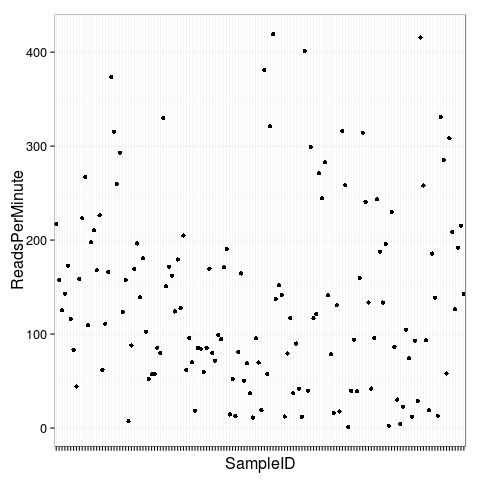

In [55]:
%%R
library(ggplot2)
rundata=read.table('rundata.txt', header=T, sep="\t")
ggplot(rundata, aes(x=SampleID, y=ReadsPerMinute)) + geom_point() + theme_bw(base_size=16) + theme(axis.text.x = element_blank())

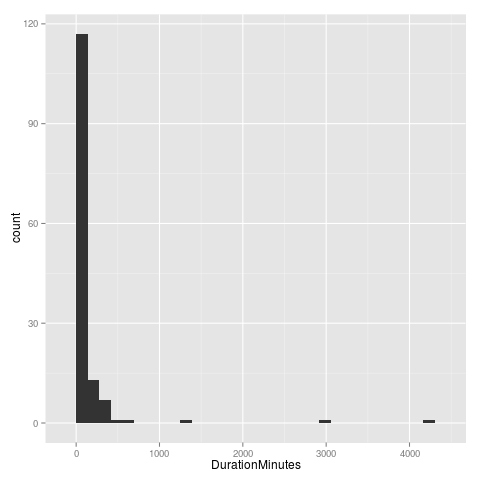

In [59]:
%%R
library(ggplot2)
rundata=read.table('rundata.txt', header=T, sep="\t")
ggplot(rundata, aes(x=DurationMinutes)) + geom_histogram()



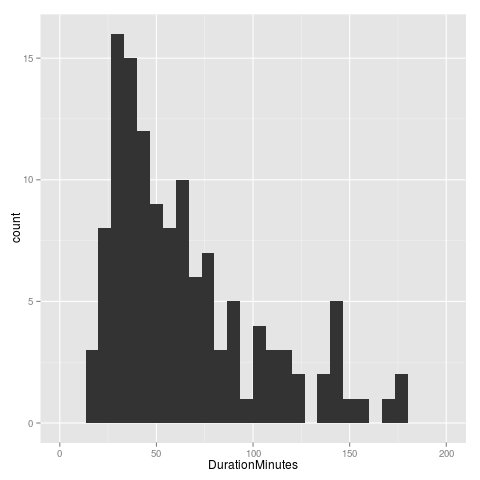

In [58]:
%%R
library(ggplot2)
rundata=read.table('rundata.txt', header=T, sep="\t")
ggplot(rundata, aes(x=DurationMinutes)) + geom_histogram() + xlim(0,200)


In [19]:
%%R
library(ggplot2)
rundata=read.table('rundata.txt', header=T, sep="\t")
print(nrow(subset(rundata, DurationMinutes <= 60)))
print(nrow(subset(rundata, DurationMinutes > 60)))
print(nrow(subset(rundata)))

[1] 71
[1] 71
[1] 142


In [ ]:
%%R
rundata=read.table('rundata.txt', header=T, sep="\t")
summary(rundata$ReadsPerMinute)

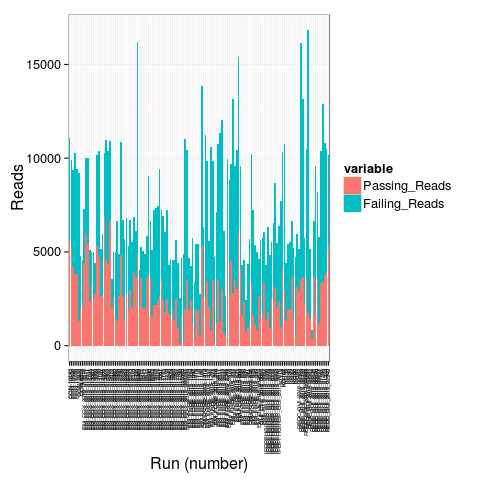

In [22]:
%%R
library(reshape2)
rundata=read.table('rundata.txt', header=T, sep="\t")
ggplot(rundata, aes(x=as.integer(rownames(rundata)), y=Passing_2D_Reads)) + geom_point() + theme_bw(base_size=16) + scale_x_discrete("Run (number)") + scale_y_continuous("Reads per minute") + theme(axis.text.x = element_text(angle=90, hjust=1, size=6))
melted=melt(rundata, id.vars='SampleID', measure.vars=c('Passing_Reads', 'Failing_Reads'))
ggplot(melted, aes(x=SampleID, y=value, fill=variable)) + geom_bar(stat='identity') +  scale_x_discrete("Run (number)") + scale_y_continuous("Reads") + theme_bw(base_size=16) + theme(axis.text.x = element_text(angle=90, hjust=1, vjust=0.5, size=6))
#ggsave("SuppFigure_PassFailReads.pdf")
#ggsave("SuppFigure_PassFailReads.png")



In [7]:
sql="""
.mode tabs
.headers on

SELECT LabID as SampleID,
       prefecture,
       date_sample_taken,
       sequencing_date
FROM samples, runs
WHERE runs.sample_fk = samples.rowid;
"""

!echo "$sql"| sqlite3 metadata.db
!echo ".mode tabs\n.output run_time_data.txt\n$sql" | sqlite3 metadata.db

SampleID	prefecture	date_sample_taken	sequencing_date
EM_COY_2015_014370	Forecariah	2015-04-07	2015-04-19
EM_COY_2015_015802	Coyah	2015-04-14	2015-04-20
EM_COY_2015_015815	Fria	2015-04-14	2015-04-20
EM_GUI_2015_004674	Siguiri	2015-03-26	2015-04-21
EM_COY_2015_015972	Forecariah	2015-04-20	2015-04-22
EM_COY_2015_015986	Fria	2015-04-20	2015-04-22
EM_COY_2015_013671	Coyah	2015-03-12	2015-04-23
EM_COY_2015_013731	Coyah	2015-03-14	2015-04-23
EM_COY_2015_014098	Conakry	2015-03-26	2015-04-24
EM_COY_2015_014100	Conakry	2015-03-26	2015-04-24
EM_COY_2015_013857	Forecariah	2015-03-18	2015-04-25
EM_COY_2015_013962	Forecariah	2015-03-22	2015-04-25
EM_COY_2015_015980	Forecariah	2015-04-20	2015-04-25
EM_COY_2015_015982	Forecariah	2015-04-20	2015-04-26
EM_FORE_2015_216	Forecariah	2015-04-30	2015-05-06
EM_FORE_2015_209	Forecariah	2015-04-28	2015-05-23
IPDPFHGINSP_GUI_2015_6505	Forecariah	2015-05-03	2015-05-07
EM_COY_2015_016238	Forecariah	2015-05-03	2015-05-07
EM_COY_2015_016263	Forecariah	2015-05-04	20

In [8]:
## Histogram of TPRs

%load_ext rpy2.ipython


/mnt/ebola/ebov/venv/local/lib/python2.7/site-packages/rpy2/ipython/rmagic.py:68: UserWarning: The Python package 'pandas' is stronglyrecommended when using `rpy2.ipython`. Unfortunately it could not be loaded, but at least we found 'numpy'.
  "but at least we found 'numpy'.")))


In [20]:
%%R
library(ggplot2)
dat=read.table("rundata.txt", header=T, sep="\t")
p=ggplot(dat, aes(x=TruePositiveRate)) + geom_histogram(binwidth=0.01) + theme_bw(base_size=16) + geom_vline(x=0.75) + xlab("True positive rate") + ylab("Count of samples")
nrow(subset(dat, TruePositiveRate >= 0.75))
#nrow(subset(dat, TruePositiveRate < 0.75))

#ggsave("SuppFigure_TruePositiveRate.pdf", p)
#p

[1] 126


In [47]:
sql="""
.mode tabs
.headers on

SELECT LabID,
  prefecture as Prefecture,
  sousprefecture as SousPrefecture,
  village as Village,
  ct as CtValue,
  date_sample_taken as DateSampleTaken,
  pcr_date_for_sequencing as PcrDateForSequencing,
  sequencing_date as SequencingDate,
  protocol as Protocol,
  runs.Batch as SequencingID
FROM samples, runs
WHERE runs.sample_fk = samples.rowid
AND dataset = 'EMLab'
AND include = 'T';
"""

!echo "$sql"| sqlite3 ../metadata/metadata.db
!echo ".output sampledata.txt\n$sql" | sqlite3 ../metadata/metadata.db

LabID	Prefecture	SousPrefecture	Village	CtValue	DateSampleTaken	PcrDateForSequencing	SequencingDate	Protocol	SequencingID
EM_COY_2015_014370	Forecariah	Sikhourou		20.82	2015-04-07	2015-04-18	2015-04-19	19 reactions	014370
EM_COY_2015_015802	Coyah	Maneah	Kalokhoyah	24.34	2015-04-14	2015-04-20	2015-04-20	11 reactions v1	015802
EM_COY_2015_015815	Fria	Doula		26.52	2015-04-14	2015-04-20	2015-04-20	11 reactions v1	015815
EM_GUI_2015_004674	Siguiri		Lero	15.81	2015-03-26	2015-04-20	2015-04-21	11 reactions v1	004674
EM_COY_2015_015972	Forecariah	Farmoriah		18.79	2015-04-20	2015-02-22	2015-04-22	11 reactions v2	015972
EM_COY_2015_015986	Fria	Baguinet		22.34	2015-04-20	2015-04-22	2015-04-22	11 reactions v2	015986
EM_COY_2015_013671	Coyah	Wonkifong		17.27	2015-03-12	2015-04-22	2015-04-23	11 reactions v2	013671
EM_COY_2015_013731	Coyah	Lansanaya		17.88	2015-03-14	2015-04-22	2015-04-23	11 reactions v2	013731
EM_COY_2015_014098	Conakry		Enta Kissosso	20.66	2015-03-26	2015-04-23	2015-04-24	11 reacti

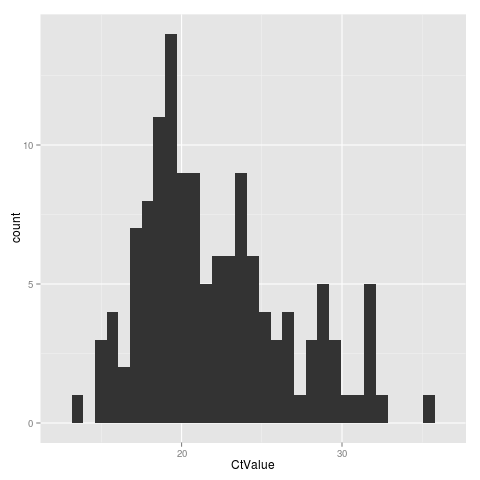

In [60]:
%%R
library(reshape2)
rundata=read.table('SuppTable_sampledata.txt', header=T, sep="\t")
ggplot(rundata, aes(x=CtValue)) + geom_histogram()